## Import the needed libraries and Packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 8)

**Import & read the dataset we are working with**

In [51]:
dataset = "DataSet.csv"

df = pd.read_csv(dataset)
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


**Display all columns headers**

In [52]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

**Looking at the column named "Unnamed: 0" it seems to represent index, so we will drop it considering we already have an index for our table** 

In [53]:
df = df.drop(labels='Unnamed: 0', axis=1)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**Lets display the full width of our data to understand each of the columns**

In [54]:
pd.set_option('display.max_columns', None)

In [55]:
df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


According to the details given about this dataset, we know that some missing values are represented through this symbol '?'. 

This symbol '?' will need to be replaced.However, we will first try to understand how to fill in the missing values by extacting some statistical summary of our dataset.

**Statistical Summary**

In [56]:
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


It can be observed that there is a lot of NaN values too, that will also need to be replaced further through our data wrangling phase.

**Solving for missing attributes**

Lets first replace '?' values which is a numeric data type used to represent values that is undefined.

In [57]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see above, the first few attributes under normalized-loses column has changed from '?' to NaN.

**Let's now check the total of missing values in each column**

In [58]:
print('   Missing Attributes')
print('-'*25)
print(df.isna().sum())
print('-'*25)
print('Total of missing attributes is', df.isna().sum().sum())

   Missing Attributes
-------------------------
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
-------------------------
Total of missing attributes is 59


## Dealing with missing values

Dealing with numerical values. These columns will be replaced with the column's mean value.

**find columns with numeric data type** 

In [59]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Finding our columns with our numeric values, in this case float and int data types.**

In [60]:
df.select_dtypes('float').columns

Index(['wheel-base', 'length', 'width', 'height', 'compression-ratio'], dtype='object')

In [61]:
df.select_dtypes('int').columns

Index(['symboling', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg'], dtype='object')

**Identifying only columns with missing attributes**

In [62]:
df.columns[df.isnull().any()]

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

It appears that some of our column that contain missing numerical attributes have object data types, in the process of cleaning the data will change normalized-losses, horsepower, bore, stroke, peak-rpm, and price's columns into float then replace missing values with each column's mean value. 

**Lets now fill in its missing values with each column's mean value.**

In [63]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [64]:
# Getting mean of columns with missing data after changing its data type to float
mean_normalized = df['normalized-losses'].astype('float').mean(axis=0)
mean_bore = df['bore'].astype('float').mean(axis=0)
mean_stroke = df['stroke'].astype('float').mean(axis=0)
mean_horsepower = df['horsepower'].astype('float').mean(axis=0)
mean_peak = df['peak-rpm'].astype('float').mean(axis=0)

In [65]:
# checking for mean values set above
print (mean_normalized)
print (mean_bore)
print (mean_stroke)
print (mean_horsepower)
print (mean_peak)

122.0
3.3297512437810957
3.2554228855721337
104.25615763546799
5125.369458128079


In [66]:
# Replacing missing attributes of the following columns with its mean value
df['normalized-losses'].replace(np.nan, mean_normalized, inplace=True)
df['bore'].replace(np.nan, mean_bore, inplace=True)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)
df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, mean_peak, inplace=True)

**Before dealing with the price column, we will first deal with our only categorical column with missing attributes (num-of-doors).**

In [67]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [68]:
max_num_of_doors = df['num-of-doors'].value_counts().idxmax()
max_num_of_doors

'four'

In [69]:
df['num-of-doors'].replace(np.nan, max_num_of_doors, inplace=True)

To confirm that the missing values had been replaced, the frequency of 'four' should've increased by number of missing attributes before which was 2.

In [70]:
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

**Lastly, we will deal with the missing values of our value to be predicted**

In [71]:
#This is the number of rows of our dataset before any rows are dropped
df.shape

(205, 26)

In [72]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.shape

(201, 26)

We can see that 4 rows that had missing price attributes were dropped, leaving us with 201 rows and 27 columns.

**Let's recheck for missing values after we dealt with it**

In [73]:
print('Total of missing attributes is:', df.isna().sum().sum())

Total of missing attributes is: 0


**Checking for columns dataypes to convert any if needed**

In [74]:
df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [75]:
# checking current column's data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Converting column's data types**

In [76]:
cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df[cols] = df[cols].astype('float')

In [77]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

As observed above, dataypes of our selected columns we successfully converted to float.

## Data Normalization

Furthermore, lets change the data type of city-mpg and highway-mpg from mpg to litres/100km as that's the most commonly used format using the formula:

* 235.215/(1 US mpg) = 235.215 L/100km.

In [78]:
df['city-L/100km'] = 235.215/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

In [79]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.200714,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.200714,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.379737,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.800625,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.067500,10.681818


Then lets drop both changed columns and leave the new added once

In [80]:
df.drop('city-mpg', axis=1, inplace=True)
df.drop('highway-mpg', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.200714,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.200714,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.379737,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.800625,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.067500,10.681818


**Lets turning categorical values to numerical values (One Hot Encoding)**

In [81]:
#df[['fuel-type']].tail(15)

In [82]:
#get_dummies_fuel = pd.get_dummies(df['fuel-type'])

In [83]:
#get_dummies_fuel.head(15)

In [84]:
#renaming columns
#get_dummies_fuel.rename(columns={'gas':'fuel_type_Gas', 'diesel':'fuel_type_diesel'}, inplace = True)
#get_dummies_fuel.head()

In [85]:
#df = pd.concat([df, get_dummies_fuel], axis=1) #appending the new columns into our main dataframe
#df.head()

In [86]:
#df.drop('fuel-type', axis=1, inplace=True)
#df.head()

**Replacing categorical values with numerical**

In [87]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [88]:
df['num-of-doors'].replace(['two', 'four'], [2, 4], inplace=True)

In [89]:
df[['num-of-doors']].head()

,num-of-doors
0,2
1,2
2,2
3,4
4,4


**Lets use binning to categorising values into ranges (horsepower)**

In [90]:
df[['horsepower']].head(8)

,horsepower
0,111.0
1,111.0
2,154.0
3,102.0
4,115.0
5,110.0
6,110.0
7,110.0


In [91]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We then label the categories or bins and replacing the labels into the values

In [92]:
group_names = ['Low', 'Medium', 'High']
df['horsepower_bin'] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest = True)
df[['horsepower', 'horsepower_bin']].tail(8)

,horsepower,horsepower_bin
197,114.0,Low
198,162.0,Medium
199,162.0,Medium
200,114.0,Low
201,160.0,Medium
202,134.0,Medium
203,106.0,Low
204,114.0,Low


In [93]:
df[['horsepower_bin']].isnull().sum()

horsepower_bin    0
dtype: int64

### Correlation Matrix

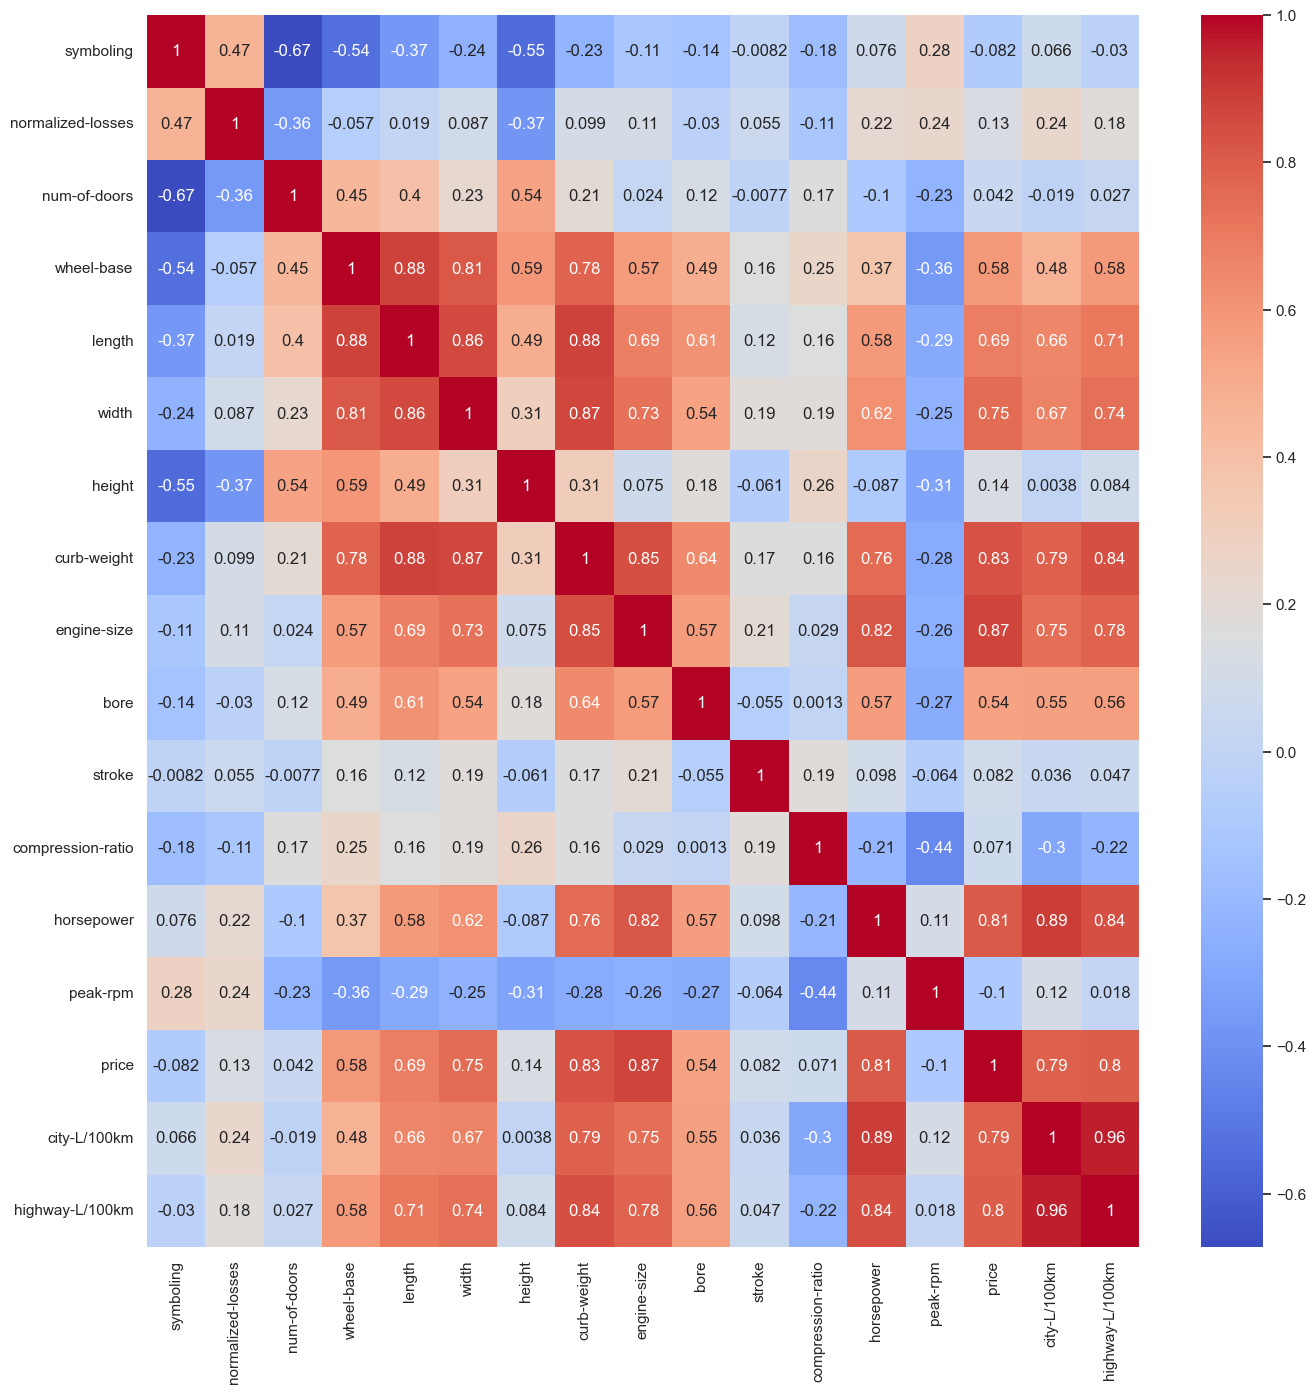

In [94]:
import seaborn as sns
sns.set()
corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')
plt.savefig('heatmap.png')

Observing the heatmap above we can see all the correlations between all the other variables in relalation to the price, which is to be predicted.

In [95]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [96]:
df['price'].astype(int)

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: int32

In [97]:
objectList = []     # list to store column names of object data type

print('Before') # attributes before encoding
print('='*35)
for col in df.columns:
    if df[col].dtype == 'object':
        objectList.append(col)
        print(col, ':', df[col].dtype, '(eg.', df[col][0], ',', df[col][3], ')')
        df[col] = le.fit_transform(df[col])
        df[col].unique()
        
print()       
print()
print('After')   #attributes after encoding
print('='*35)
for items in objectList:
    print(items, ':', df[items].dtype, '(eg.', df[items][0], ',', df[items][3], ')')

Before
make : object (eg. alfa-romero , audi )
fuel-type : object (eg. gas , gas )
aspiration : object (eg. std , std )
body-style : object (eg. convertible , sedan )
drive-wheels : object (eg. rwd , fwd )
engine-location : object (eg. front , front )
engine-type : object (eg. dohc , ohc )
num-of-cylinders : object (eg. four , four )
fuel-system : object (eg. mpfi , mpfi )


After
make : int32 (eg. 0 , 1 )
fuel-type : int32 (eg. 1 , 1 )
aspiration : int32 (eg. 0 , 0 )
body-style : int32 (eg. 0 , 3 )
drive-wheels : int32 (eg. 2 , 1 )
engine-location : int32 (eg. 0 , 0 )
engine-type : int32 (eg. 0 , 2 )
num-of-cylinders : int32 (eg. 2 , 2 )
fuel-system : int32 (eg. 5 , 5 )


In [106]:
import numpy as np

print('The correlation coefficient between the dependent variable (price) and the other independent variables: \n')
for name in df.columns:
    if name != 'price' and df[name].dtype in [np.float64, np.int64]:  # Check if column has numeric data
        correlation = df[name].corr(df['price'])
        print(f"{name} : {correlation}")

The correlation coefficient between the dependent variable (price) and the other independent variables: 

symboling : -0.08239118716962357
normalized-losses : 0.13399873429274337
num-of-doors : 0.04243534269811202
wheel-base : 0.5846418222655079
length : 0.6906283804483643
width : 0.7512653440522671
height : 0.13548630756805974
curb-weight : 0.8344145257702844
engine-size : 0.8723351674455185
bore : 0.5431553832626601
stroke : 0.0822692885532581
compression-ratio : 0.07110732668194146
horsepower : 0.809574567003656
peak-rpm : -0.10161587407588143
city-L/100km : 0.7898975136626942
highway-L/100km : 0.8011176263981974


## Creating a model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# Preparing the linear regression model
lm = LinearRegression()

# setting price as our dependenr varaible
y = df['price']

# we will use this dictionary to store name and model score of the independent varaibles for later comparisons
list_of_results = {}

In [108]:
# creating a function to plot a model graph for each independent vairiable used
def plotGraph(name):
    X = np.array(df[name]).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state=69)
    
    # Lets train the model with the training data 
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    # The main feature of the function
    #ploting regression graph with RMSE score
    r2 = round((r2_score(y_test, y_pred)), 3)
    plt.figure(figsize = (8, 5))
    plt.scatter(X_test, y_test, color = 'blue')
    
    plt.plot(X_test, y_pred, color = 'red') # best line fit
    
    plt.title('R2 score: ' + str(r2), fontsize = 15, color = 'red')
    plt.xlabel(name, fontsize = 12)
    plt.ylabel('Price' , fontsize = 12)
    
    plt.legend(['Prediction', 'Real Values'])
    plt.show()
    
    # finally insert name and result variable into our list_of_results dictionary
    list_of_results[name] = r2

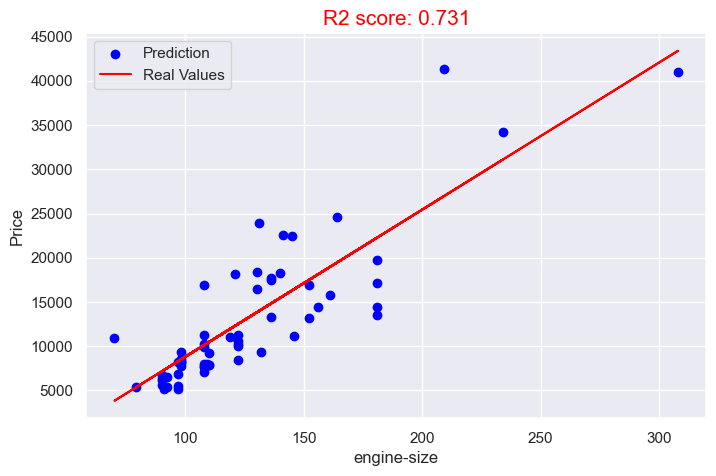

In [109]:
# plotting the model graph using our first independent variables
plotGraph('engine-size')

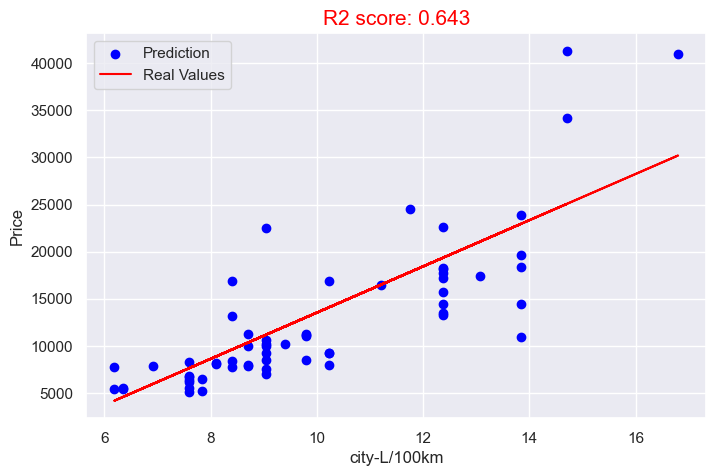

In [110]:
# plotting the model graph using our first independent variables
plotGraph('city-L/100km')

In [111]:
# Lastly, printing the score of the model accuracy for each indendent varaible 
print('-'*40)
print(" Independent varaiable:   Score")
print('-'*40)

for key, value in list_of_results.items():
    print(key, ': ', value)

----------------------------------------
 Independent varaiable:   Score
----------------------------------------
engine-size :  0.731
city-L/100km :  0.643


## END